<a href="https://colab.research.google.com/github/stacykeago/KPMG/blob/main/Tata_Motors_Stock_Price_Prediction_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Define the question
There has been an increase of more than 10 per cent in the stock price of Tata Motors. This has resulted in more attention to Tata Group stocks from all over India. But again today, we are witnessing a fall in the prices of Tata Motors’ shares, which can be a negative signal for investors.  we want to learn how to analyze and predict the Tata Motors stock price

2. Metric for success
Making correct predictions on Tata Motors stock price with the model with the lowest mean squared error or the model with highest accuracy.

3. Experimental design taken
Import libraries
Load  dataset
clean the data 
Exploratory data analysis techniques

4. Appropriateness of available data to answer the given question. To get the data:
        *   Visit Yahoo Finance
        *   Search for Tata Motors or TTM (it’s the stock symbol of Tata Motors)
        *   Then click on Historical data and click on download.         


# DATA CLEANING

## Import libraries

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt       # for data visualization
import seaborn as sns                       # for statistical data visualization
%matplotlib inline

## Load Datasets

In [ ]:
ttm = pd.read_csv('/TTM.csv')
ttm

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-01,21.860001,21.910000,21.690001,21.790001,21.790001,718400
1,2021-06-02,21.990000,22.400000,21.980000,22.340000,22.340000,1278400
2,2021-06-03,22.299999,22.490000,22.129999,22.240000,22.240000,1022200
3,2021-06-04,22.980000,23.680000,22.930000,23.600000,23.600000,2969000
4,2021-06-07,23.680000,23.940001,23.600000,23.799999,23.799999,2672300
...,...,...,...,...,...,...,...
249,2022-05-25,26.719999,27.459999,26.600000,27.240000,27.240000,792900
250,2022-05-26,27.290001,28.270000,27.290001,28.010000,28.010000,719200
251,2022-05-27,28.020000,28.219999,27.900000,28.190001,28.190001,700500
252,2022-05-31,28.690001,28.780001,27.990000,28.500000,28.500000,734000


In [ ]:
# Rows and columns
ttm.shape

(254, 7)

## Dataset summary info

In [ ]:
#Check for dataset info
ttm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


## Numeric Features Description

In [ ]:
# Count, mean, standard deviation, minimum, maximum,
ttm.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,254.0,2.713106e+01,5.088377e+00,18.48,22.314999,27.995,3.216000e+01,3.510000e+01
High,254.0,2.746523e+01,5.179178e+00,18.76,22.530000,28.335,3.242750e+01,3.538000e+01
Low,254.0,2.684587e+01,5.008114e+00,18.48,22.139999,27.650,3.170000e+01,3.491000e+01
Close,254.0,2.717012e+01,5.089870e+00,18.73,22.340000,28.085,3.196500e+01,3.494000e+01
Adj Close,254.0,2.717012e+01,5.089870e+00,18.73,22.340000,28.085,3.196500e+01,3.494000e+01
Volume,254.0,1.367741e+06,1.016454e+06,209593.00,722175.000000,1061600.000,1.660675e+06,7.337100e+06


# Preprocessing data

### Column list

In [ ]:
ttm.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

###  Check for duplicates

In [ ]:
ttm.duplicated().any()

False

### Check for unique

In [ ]:
# Check for unique values in each column
ttm.nunique()

Date         254
Open         219
High         232
Low          222
Close        225
Adj Close    225
Volume       253
dtype: int64

### Data types in each column

In [ ]:
# Check for data types in each column
ttm.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

#### # Convert Date column to data type " Date" format

In [ ]:
# Convert Date column to data type " Date"
ttm['Date'] = pd.to_datetime(ttm.Date)
ttm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-01,21.860001,21.910000,21.690001,21.790001,21.790001,718400
1,2021-06-02,21.990000,22.400000,21.980000,22.340000,22.340000,1278400
2,2021-06-03,22.299999,22.490000,22.129999,22.240000,22.240000,1022200
3,2021-06-04,22.980000,23.680000,22.930000,23.600000,23.600000,2969000
4,2021-06-07,23.680000,23.940001,23.600000,23.799999,23.799999,2672300


### Check for null values

In [ ]:
ttm.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Check for NA Values

In [ ]:
print("NA values:", ttm.isna().values.any())

NA values: False


## Sorting dataset by date format

In [ ]:
ttm.sort_values(by='Date', inplace=True)
ttm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-01,21.860001,21.910000,21.690001,21.790001,21.790001,718400
1,2021-06-02,21.990000,22.400000,21.980000,22.340000,22.340000,1278400
2,2021-06-03,22.299999,22.490000,22.129999,22.240000,22.240000,1022200
3,2021-06-04,22.980000,23.680000,22.930000,23.600000,23.600000,2969000
4,2021-06-07,23.680000,23.940001,23.600000,23.799999,23.799999,2672300


### Outliers

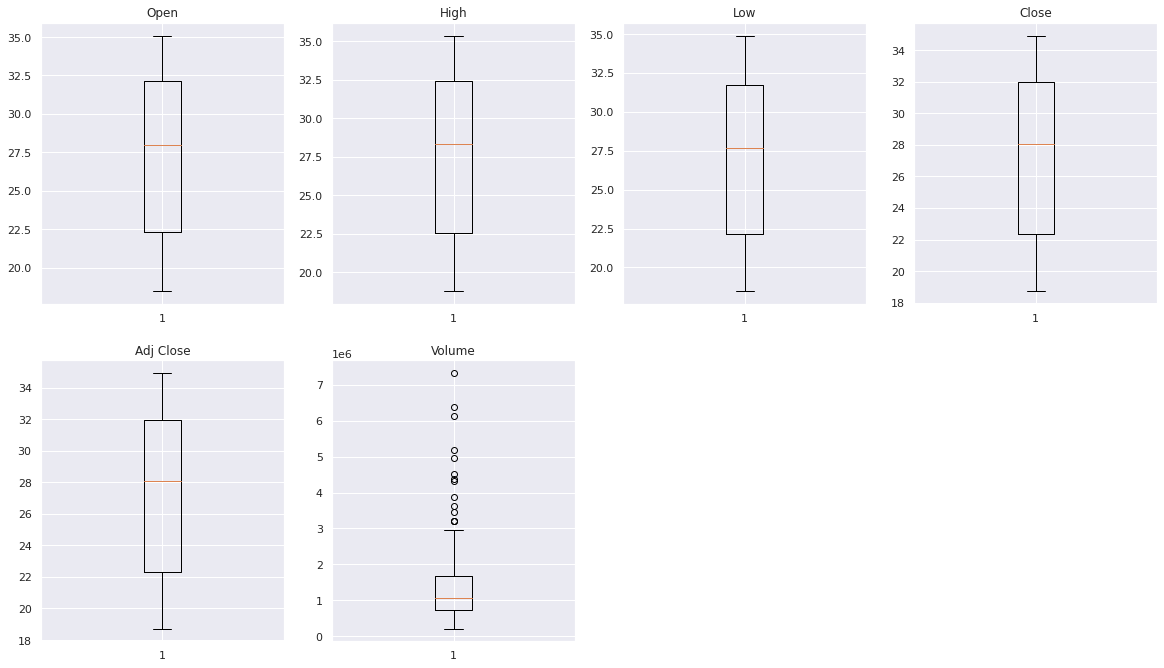

In [ ]:
columns_dict ={ 'Open':1, 'High':2, 'Low':3, 'Close':4, 'Adj Close':5, 'Volume':6}
plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(ttm[variable])
  plt.title(variable)

plt.show()

# EXPLORATORY DATA ANALYSIS

## Monthwise comparision between Stock open and close price

In [ ]:
monthwise= ttm.groupby(ttm['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise

,Open,Close
Date,,
January,33.145500,33.154500
February,32.240526,32.351579
March,27.716522,27.637391
April,28.658000,28.671000
May,26.722857,26.840952
June,23.269131,23.256522
July,20.367619,20.366667
August,19.675909,19.703636
September,20.843334,20.915714


## Plot Monthwise comparision between Stock open and close price

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Open'],
    name='Stock Open Price',
    marker_color='crimson'))

fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

## Monthwise High and Low stock price

In [ ]:
# Monthwise High and Low stock price
ttm.groupby(ttm['Date'].dt.strftime('%B'))['Low'].min()

Date
April        27.350000
August       18.480000
December     28.870001
February     27.520000
January      30.250000
July         19.070000
June         21.690001
March        24.500000
May          22.920000
November     30.020000
October      22.110001
September    19.639999
Name: Low, dtype: float64

## Plot Monthwise High and Low stock price

In [ ]:
ttm.groupby(ttm['Date'].dt.strftime('%B'))['Low'].min()
monthwise_high = ttm.groupby(ttm['Date'].dt.strftime('%B'))['High'].max()
monthwise_high = monthwise_high.reindex(new_order, axis=0)

monthwise_low = ttm.groupby(ttm['Date'].dt.strftime('%B'))['Low'].min()
monthwise_low = monthwise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthwise_high.index,
    y=monthwise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'))

fig.add_trace(go.Bar(
    x=monthwise_low.index,
    y=monthwise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'))

## Trend comparision between stock open price, close price, high price, low price

In [ ]:
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(ttm, x=ttm.Date, y=[ttm['Open'], ttm['Close'], 
                                          ttm['High'], ttm['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()



###  Close price prediction preparation and preprocessing

In [ ]:
# Make separate dataframe of close price

closedf = ttm[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (254, 2)


#### Plotting Stock Close price chart

In [ ]:
# Plotting Stock Close price chart
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'Date':'Date','Close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Print the duration of the dataset

In [ ]:
print("Starting date: ",ttm.iloc[0][0])
print("Ending date: ", ttm.iloc[-1][0])
print("Duration: ", ttm.iloc[-1][0]-ttm.iloc[0][0])

Starting date:  2021-06-01 00:00:00
Ending date:  2022-06-01 00:00:00
Duration:  365 days 00:00:00


## Consider the last 6 months

In [ ]:
closedf = closedf[closedf['Date'] > '2021-12-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  125


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'Date':'Date','Close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered last 6months period to predict Stock close price', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# UNIVARIATE ANALYSIS

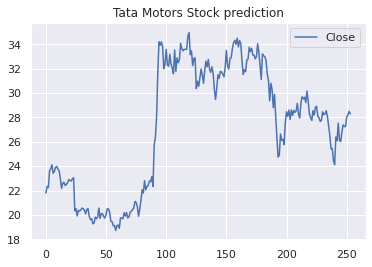

In [ ]:
ttm[['Close']].plot()
plt.title("Tata Motors Stock prediction")
plt.show()

In [ ]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

Text(0.5, 1.0, 'Tata Autocorrelation plot')

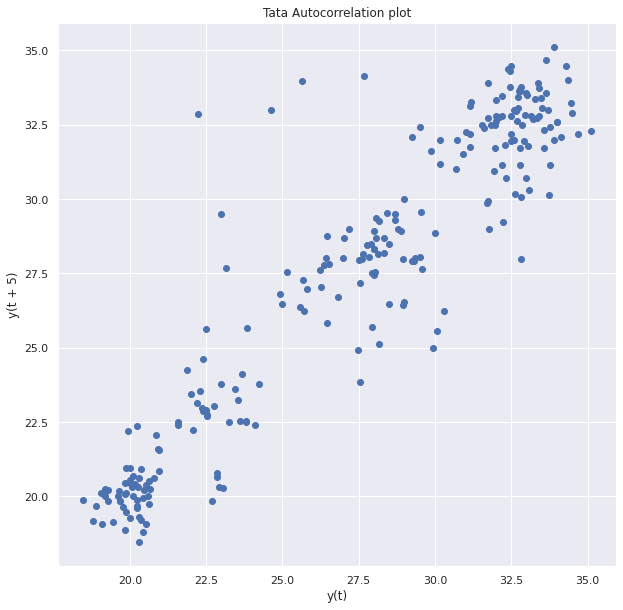

In [ ]:
plt.figure(figsize=(10,10))
lag_plot(ttm.Open, lag=5)
plt.title("Tata Autocorrelation plot")


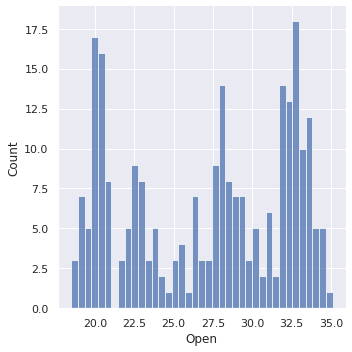

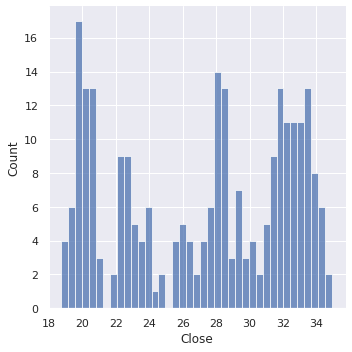

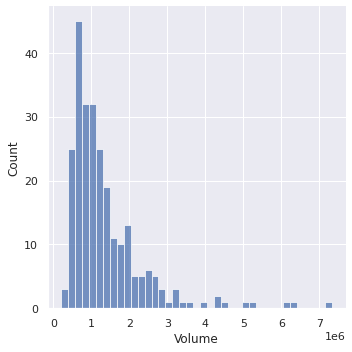

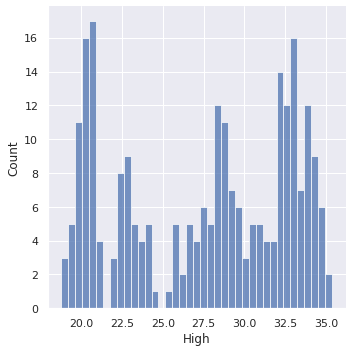

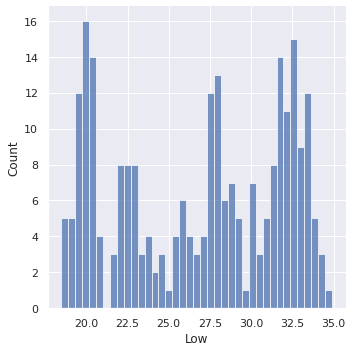

In [ ]:
# Univariate analysis
sns.displot(ttm.Open.dropna(), kde=False, bins = 39);
sns.displot(ttm.Close.dropna(), kde=False, bins = 39);
sns.displot(ttm.Volume.dropna(), kde=False, bins = 39);
sns.displot(ttm.High.dropna(), kde=False, bins = 39);
sns.displot(ttm.Low.dropna(), kde=False, bins = 39);


## Pair plot

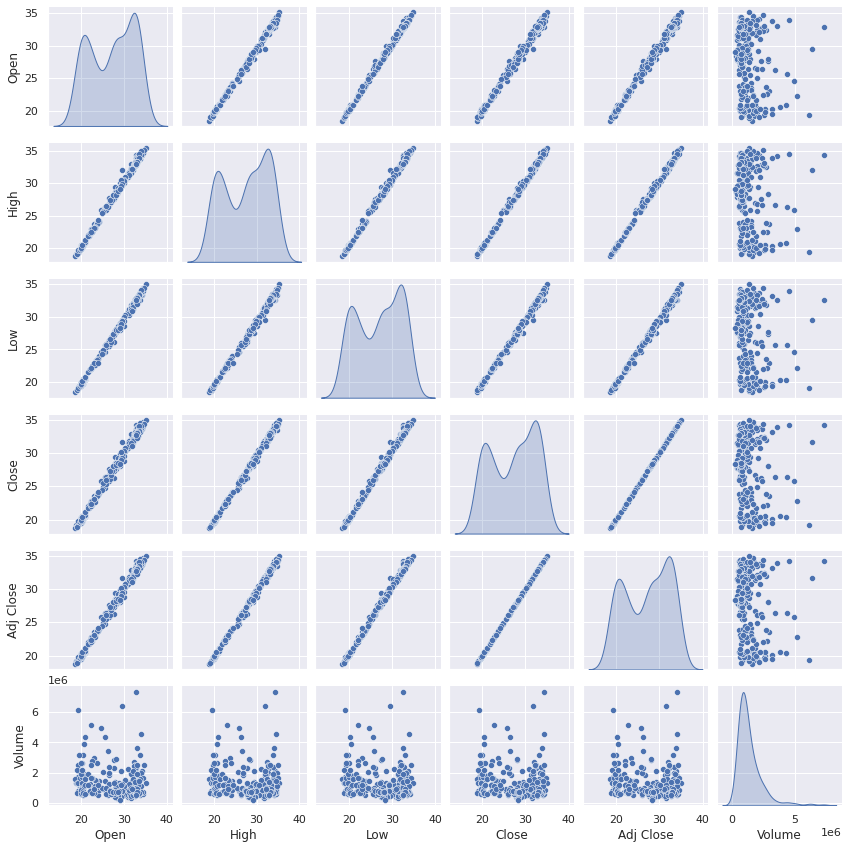

In [ ]:
sns.set()
columns1 = [ 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
sns.pairplot(ttm[columns1],height = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

# BIVARIATE ANALYSIS

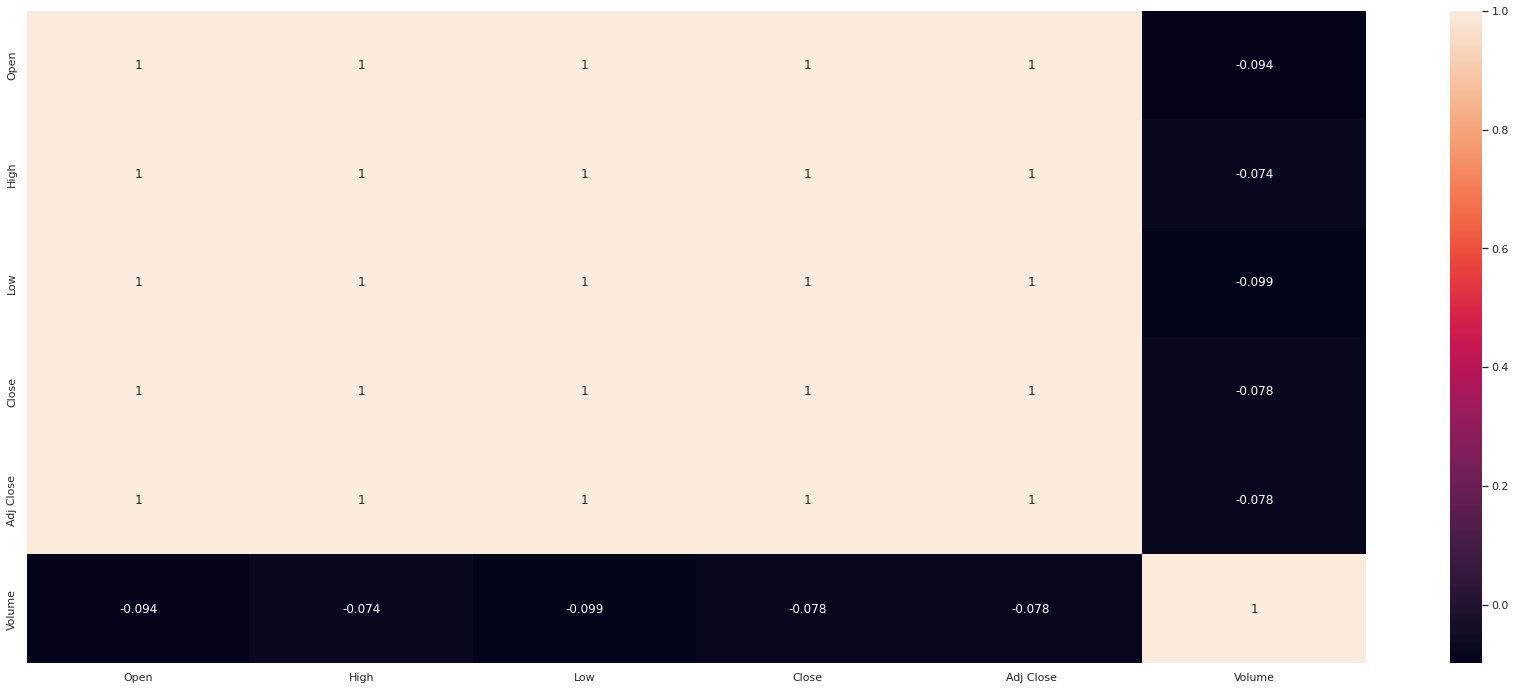

In [ ]:
# Heatmap
plt.figure(figsize=(30, 12))
vg_corr = ttm.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

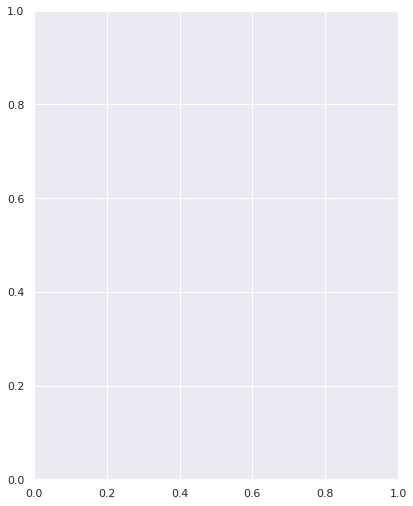

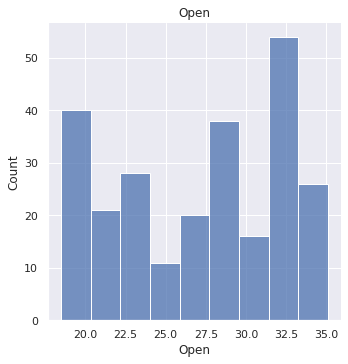

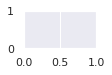

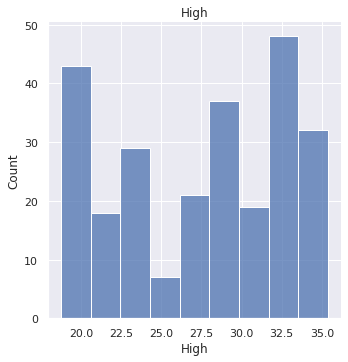

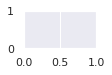

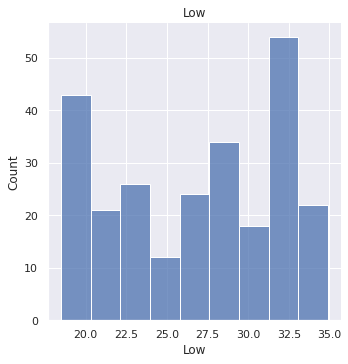

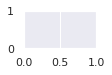

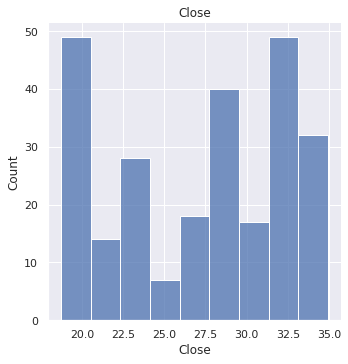

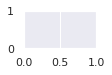

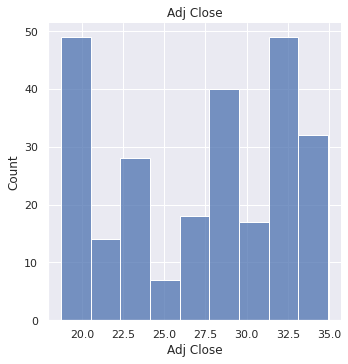

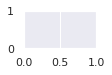

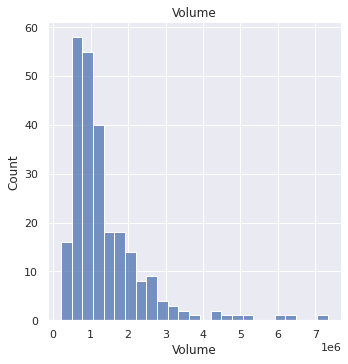

In [ ]:
columns_dict ={ 'Open':1, 'High':2, 'Low':3, 'Close':4, 'Adj Close':5, 'Volume':6}

# Ploting the univariate summaries and recording our observations
# plot histograms for all numeric columns
# we use the dictionary we had earlier on saved

plt.figure(figsize = (30,50))
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  sns.displot(ttm[variable])
  plt.title(variable)
  plt.show()

### Data Correlation

In [ ]:
print(ttm.corr())

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.998341  0.998634  0.996573   0.996573 -0.093653
High       0.998341  1.000000  0.998102  0.998713   0.998713 -0.073534
Low        0.998634  0.998102  1.000000  0.998140   0.998140 -0.099024
Close      0.996573  0.998713  0.998140  1.000000   1.000000 -0.078186
Adj Close  0.996573  0.998713  0.998140  1.000000   1.000000 -0.078186
Volume    -0.093653 -0.073534 -0.099024 -0.078186  -0.078186  1.000000


### Price prediction

In [ ]:
!pip install autots
# Using the autots library in Python to prepare the stock prices of Tata Motors for the next 5 days

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#from autots import AutoTS
#model = AutoTS(forecast_length=5, frequency='infer', ensemble='simple')
#model = model.fit(ttm, date_col='Date', value_col='Close', id_col=None)
#prediction = model.predict()
#forecast = prediction.forecast
#print(forecast)

# RANDOM FOREST REGRESSION

### Normalizing / scaling close value between 0 to 1

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
close_stock = closedf.copy()
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(125, 1)


### Split data for training and testing

In [ ]:
training_size=int(len(closedf)*0.65)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_Data: ", train_data.shape)
print("test_Data: ", test_data.shape)

train_Data:  (81, 1)
test_Data:  (44, 1)


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (65, 15)
y_train:  (65,)
X_test:  (28, 15)
y_test (28,)


# KNN

In [ ]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [ ]:
# Lets Do the prediction 

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (65, 1)
Test data prediction: (28, 1)


In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict) 
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
import math

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1.2660284555312808
Train data MSE:  1.6028280502149206
Test data MAE:  0.9225845928205136
-------------------------------------------------------------------------------------
Test data RMSE:  1.2798252665583714
Test data MSE:  1.6379527129212061
Test data MAE:  0.9943810499999997


#CONCLUSION

In [ ]:
#Explained variance regression score
#The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: 
#Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired,
 #indicating better squares of standard deviations of errors.

In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.7765195581420143
Test data explained variance regression score: -0.0024468790856635447


In [ ]:
# R2 score for regression
# R-squared (R2) is a statistical measure that represents the proportion of the
 # variance for a dependent variable that's explained by an independent variable or variables in a regression model.
 # 1 = Best
# 0 or < 0 = worse

print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.7725574670218344
Test data R2 score: -0.06663309366306813


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = neighbor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


### Plotting last 15 days and next predicted 10 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])
fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()